In [1]:
#ignorar warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Cargar el dataset limpio

In [2]:
df = pd.read_csv('../csv/titanic_eda_final.csv')

# Definir variables de características (X) y objetivo (y)
X = df.drop('Survived', axis=1)
Y = df['Survived']

# 2. Dividir en train/test (train_test_split)

In [3]:
# Usamos un 80% para entrenamiento y 20% para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")


Dimensiones de los conjuntos de datos:
X_train: (712, 8)
X_test: (179, 8)


# 3. Escalar datos (StandardScaler)

In [4]:

scaler = StandardScaler()
# Ajustar el escalador solo con los datos de entrenamiento y luego transformar
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 4. Entrenar y evaluar modelos

--- Resultados: Regresion Logistica ---
Accuracy: 0.8101

Matriz de Confusión:
 [[90 15]
 [19 55]]

Reporte de Clasificación:
                   precision    recall  f1-score   support

No Sobrevive (0)       0.83      0.86      0.84       105
   Sobrevive (1)       0.79      0.74      0.76        74

        accuracy                           0.81       179
       macro avg       0.81      0.80      0.80       179
    weighted avg       0.81      0.81      0.81       179



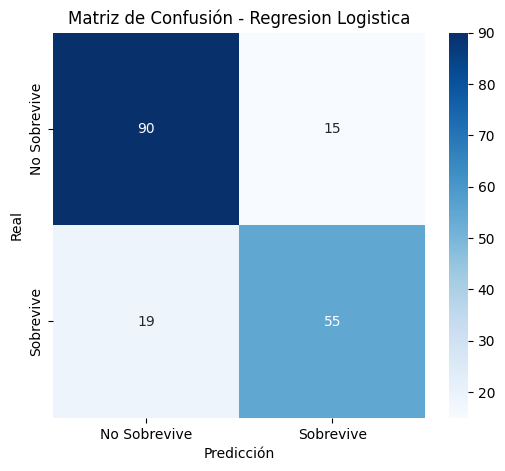

In [5]:

# Inicializar almacenamiento de resultados
metrics_results = []
confusion_matrices = {}

# 4.1. Regresión Logística

name = "Regresion Logistica"
model_lr = LogisticRegression()

# Entrenamiento: Usamos datos escalados
model_lr.fit(X_train_scaled, Y_train)
Y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluación: Métricas
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
report_lr = classification_report(Y_test, Y_pred_lr, target_names=['No Sobrevive (0)', 'Sobrevive (1)'], output_dict=True)

confusion_matrices[name] = cm_lr
metrics_results.append({
    "Modelo": name,
    "Accuracy": accuracy_lr,
    "Precision (Sobrevive)": report_lr['Sobrevive (1)']['precision'],
    "Recall (Sobrevive)": report_lr['Sobrevive (1)']['recall'],
    "F1-Score (Sobrevive)": report_lr['Sobrevive (1)']['f1-score'],
})

# Evaluación



print(f"--- Resultados: {name} ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nMatriz de Confusión:\n", cm_lr)
print("\nReporte de Clasificación:\n", classification_report(Y_test, Y_pred_lr, target_names=['No Sobrevive (0)', 'Sobrevive (1)']))



# Matriz de confusión (Visualización)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión - {name}')
plt.show()



--- Resultados: Arbol de Decision ---
Accuracy: 0.7933

Matriz de Confusión:
 [[86 19]
 [18 56]]

Reporte de Clasificación:
                   precision    recall  f1-score   support

No Sobrevive (0)       0.83      0.82      0.82       105
   Sobrevive (1)       0.75      0.76      0.75        74

        accuracy                           0.79       179
       macro avg       0.79      0.79      0.79       179
    weighted avg       0.79      0.79      0.79       179



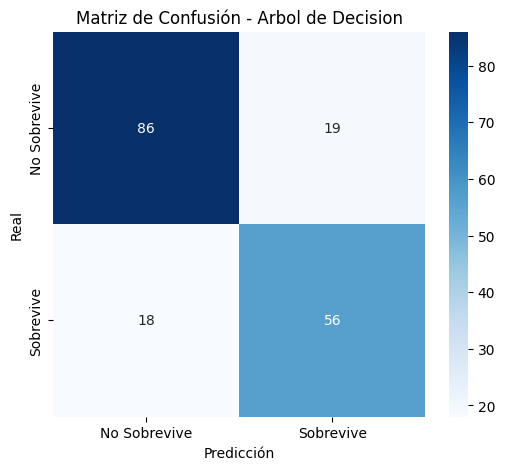

In [6]:
# 4.2. Árbol de Decisión
name = "Arbol de Decision"
model_dt = DecisionTreeClassifier()

# Entrenamiento: No es sensible al escalado, usamos datos sin escalar
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict(X_test)

# Evaluación
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
cm_dt = confusion_matrix(Y_test, y_pred_dt)
report_dt = classification_report(Y_test, y_pred_dt, target_names=['No Sobrevive (0)', 'Sobrevive (1)'], output_dict=True)

confusion_matrices[name] = cm_dt
metrics_results.append({
    "Modelo": name,
    "Accuracy": accuracy_dt,
    "Precision (Sobrevive)": report_dt['Sobrevive (1)']['precision'],
    "Recall (Sobrevive)": report_dt['Sobrevive (1)']['recall'],
    "F1-Score (Sobrevive)": report_dt['Sobrevive (1)']['f1-score'],
})

print(f"--- Resultados: {name} ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nMatriz de Confusión:\n", cm_dt)
print("\nReporte de Clasificación:\n", classification_report(Y_test, y_pred_dt, target_names=['No Sobrevive (0)', 'Sobrevive (1)']))

# Matriz de confusión (Visualización)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión - {name}')
plt.show()


--- Resultados: k-Nearest Neighbors (k-NN) ---
Accuracy: 0.8045

Matriz de Confusión:
 [[90 15]
 [20 54]]

Reporte de Clasificación:
                   precision    recall  f1-score   support

No Sobrevive (0)       0.82      0.86      0.84       105
   Sobrevive (1)       0.78      0.73      0.76        74

        accuracy                           0.80       179
       macro avg       0.80      0.79      0.80       179
    weighted avg       0.80      0.80      0.80       179



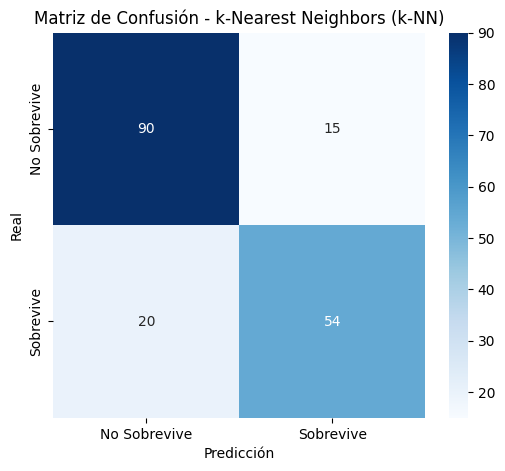

In [7]:
# 4.3. k-Nearest Neighbors (k-NN)
name = "k-Nearest Neighbors (k-NN)"
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento: Usamos datos escalados (es crucial para modelos basados en distancia)
model_knn.fit(X_train_scaled, Y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluación
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
cm_knn = confusion_matrix(Y_test, y_pred_knn)
report_knn = classification_report(Y_test, y_pred_knn, target_names=['No Sobrevive (0)', 'Sobrevive (1)'], output_dict=True)

confusion_matrices[name] = cm_knn
metrics_results.append({
    "Modelo": name,
    "Accuracy": accuracy_knn,
    "Precision (Sobrevive)": report_knn['Sobrevive (1)']['precision'],
    "Recall (Sobrevive)": report_knn['Sobrevive (1)']['recall'],
    "F1-Score (Sobrevive)": report_knn['Sobrevive (1)']['f1-score'],
})

print(f"--- Resultados: {name} ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nMatriz de Confusión:\n", cm_knn)
print("\nReporte de Clasificación:\n", classification_report(Y_test, y_pred_knn, target_names=['No Sobrevive (0)', 'Sobrevive (1)']))

# Matriz de confusión (Visualización)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión - {name}')
plt.show()

# 5. Comparar modelos en una tabla de métricas


In [8]:
metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.set_index('Modelo')

print("=== TABLA DE COMPARACIÓN DE MODELOS ===")
print(metrics_df.round(4))

=== TABLA DE COMPARACIÓN DE MODELOS ===
                            Accuracy  Precision (Sobrevive)  \
Modelo                                                        
Regresion Logistica           0.8101                 0.7857   
Arbol de Decision             0.7933                 0.7467   
k-Nearest Neighbors (k-NN)    0.8045                 0.7826   

                            Recall (Sobrevive)  F1-Score (Sobrevive)  
Modelo                                                                
Regresion Logistica                     0.7432                0.7639  
Arbol de Decision                       0.7568                0.7517  
k-Nearest Neighbors (k-NN)              0.7297                0.7552  


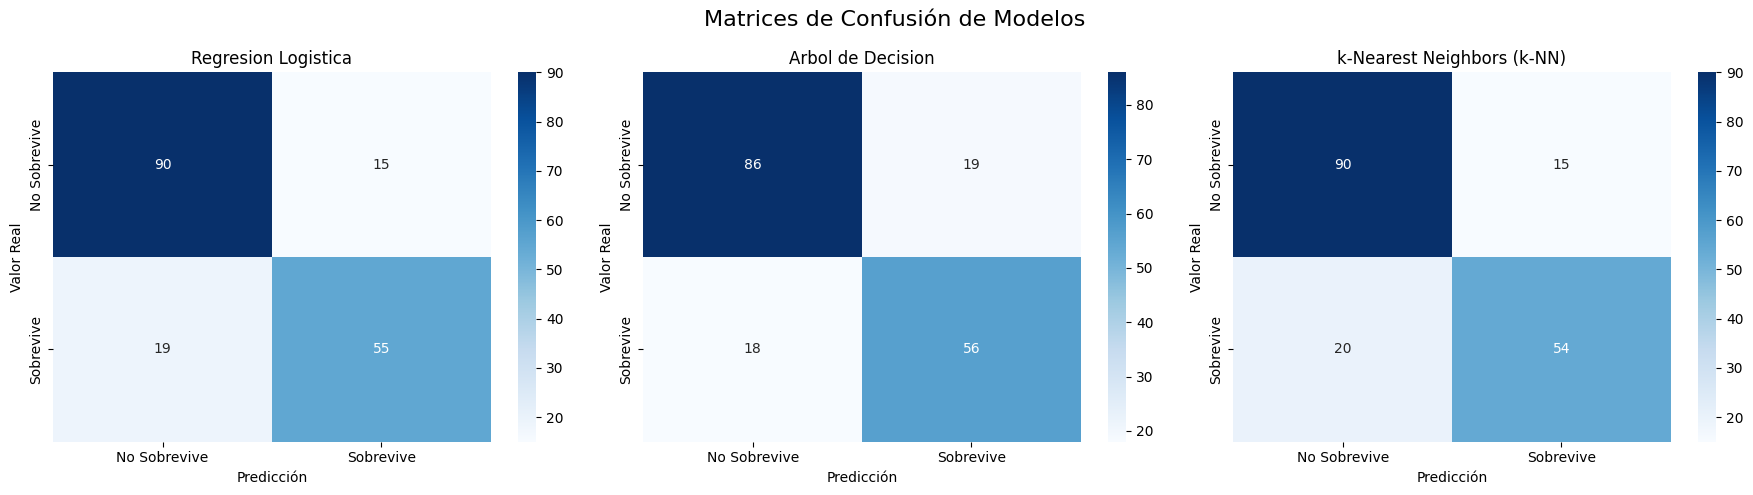

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrices de Confusión de Modelos', fontsize=16)

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Sobrevive', 'Sobrevive'],
                yticklabels=['No Sobrevive', 'Sobrevive'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Valor Real')
    axes[i].set_xlabel('Predicción')

plt.tight_layout()
plt.show()